# Modelling AllState Claim Severity
### by Jérôme Blanchet


# Abstract





# Table of Contents

Part 1) Data Description ....................................................................................................XXX
 
Part 2) Correlation Study....................................................................................................XXX.
 
Part 3) Preprocessing the Data...............................................................................................XXX.
 
Part 4) Modelling............................................................................................................XXX.

# Part 1) Data and Modules Importation

In [61]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from pandas import DataFrame
from scipy.stats.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import StratifiedKFold, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

#DATA = pd.read_csv("C:/Users/jeblanch/Documents/AllState Claim Severity.csv")

import io
import requests
url="https://raw.githubusercontent.com/rpwr021/Kaggle_allstate/master/train.csv"
s=requests.get(url).content
DATA=pd.read_csv(io.StringIO(s.decode('utf-8')))

pd.set_option('display.max_columns', None)

import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy
print('numpy: {}'.format(numpy.__version__))
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
scipy: 0.18.1
numpy: 1.11.1
matplotlib: 1.5.3
pandas: 0.18.1
sklearn: 0.17.1


# Part 2) Data Description and Interaction

In [13]:
DATA.head(20)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
5,13,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,B,A,A,A,A,A,D,D,D,E,C,A,P,J,D,A,A,E,E,H,F,B,BI,CS,A,AS,AE,A,K,DJ,0.546670,0.681761,0.634224,0.373816,0.302678,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
6,14,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,D,C,B,B,B,A,A,A,A,A,D,D,D,E,C,A,P,J,A,A,C,E,E,H,F,B,BI,DK,A,J,AF,A,K,DJ,0.471447,0.737068,0.613660,0.189137,0.295397,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22
7,20,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,B,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,D,B,D,A,B,C,B,D,C,D,A,A,A,A,C,B,C,E,A,C,T,H,C,A,A,K,F,F,I,G,BI,EB,G,AH,Y,A,P,LO,0.826591,0.488789,0.263570,0.623770,0.473767,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416,3585.75
8,23,A,B,B,B,B,A,A,A,B,B,B,B,B,A,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,B,B,B,C,B,D,D,A,A,B,A,A,D,C,C,E,C,D,T,C,Q,A,C,H,F,G,M,K,BI,BC

In [14]:
DATA.shape

(188318, 132)

In [42]:
DATA.isnull().values.any()

False

In [15]:
print(DATA.describe())

                  id          cont1          cont2          cont3  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean   294135.982561       0.493861       0.507188       0.498918   
std    169336.084867       0.187640       0.207202       0.202105   
min         1.000000       0.000016       0.001149       0.002634   
25%    147748.250000       0.346090       0.358319       0.336963   
50%    294539.500000       0.475784       0.555782       0.527991   
75%    440680.500000       0.623912       0.681761       0.634224   
max    587633.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.491812       0.487428       0.490945       0.484970   
std         0.211292       0.209027       0.205273       0.178450   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.2811

In [11]:
DATA.columns.values

array(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14',
       'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21',
       'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28',
       'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35',
       'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42',
       'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49',
       'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56',
       'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63',
       'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70',
       'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77',
       'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84',
       'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91',
       'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98',
       'cat99', 'cat100

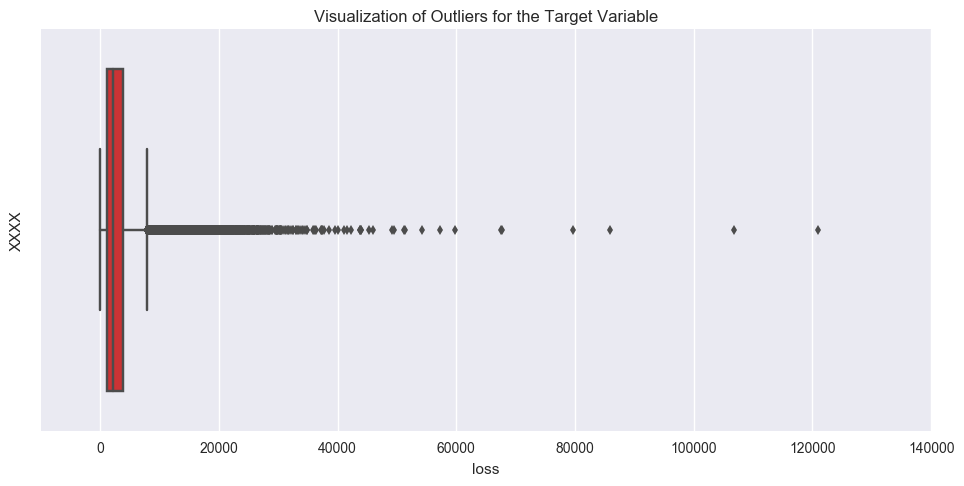

In [3]:
plt.figure(figsize=(10,5))
plt.xlabel('Loss')
plt.ylabel('XXXX')
plt.title('Visualization of Outliers for the Target Variable')
plt.xlim([-10000,140000])
plt.tight_layout()
sns.boxplot(DATA["loss"], palette="Set1");

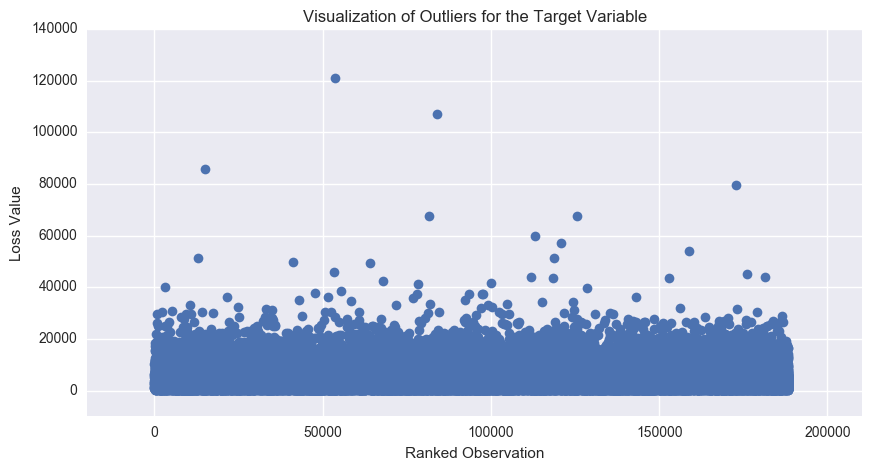

In [95]:
plt.figure(figsize=(10,5))
plt.xlabel('Ranked Observation')
plt.ylabel('Loss Value')
plt.title('Visualization of Outliers for the Target Variable')
plt.xlim([-20000,210318])
plt.ylim([-10000,140000])
plt.plot(DATA.index, DATA["loss"],'o')
plt.show()

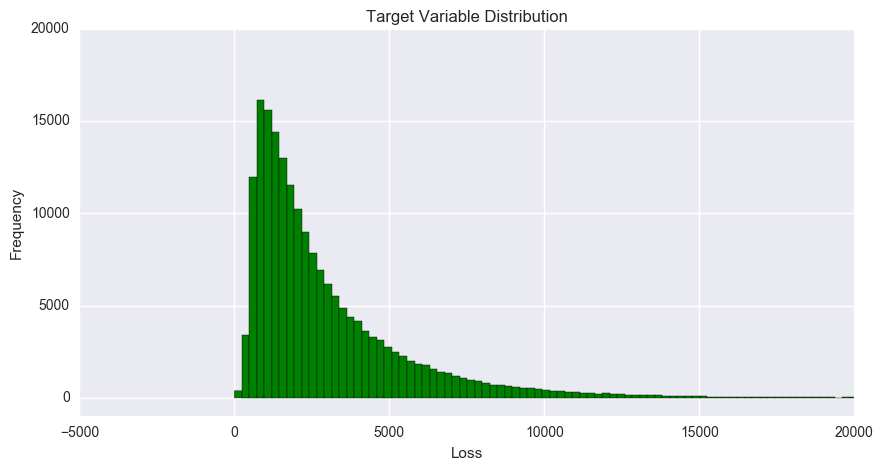

In [85]:
plt.figure(figsize=(10,5))
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Target Variable Distribution')
plt.xlim([-5000,20000])
plt.ylim([-1000,20000])
DATA.loss.hist(bins=500, color='g')

,cont1,cont2,cont3,cont4
count,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812
std,0.187640,0.207202,0.202105,0.211292
min,0.000016,0.001149,0.002634,0.176921
25%,0.346090,0.358319,0.336963,0.327354
50%,0.475784,0.555782,0.527991,0.452887
75%,0.623912,0.681761,0.634224,0.652072
max,0.984975,0.862654,0.944251,0.954297


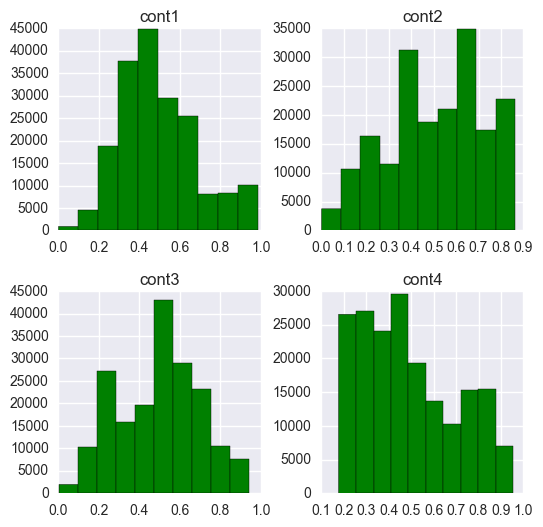

In [81]:
pylab.rcParams['figure.figsize'] = (6, 6)
DATA.loc[:,"cont1":"cont4"].hist(color='green')
DATA.loc[:,"cont1":"cont4"].describe()

,cont5,cont6,cont7,cont8
count,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.487428,0.490945,0.484970,0.486437
std,0.209027,0.205273,0.178450,0.199370
min,0.281143,0.012683,0.069503,0.236880
25%,0.281143,0.336105,0.350175,0.312800
50%,0.422268,0.440945,0.438285,0.441060
75%,0.643315,0.655021,0.591045,0.623580
max,0.983674,0.997162,1.000000,0.980200


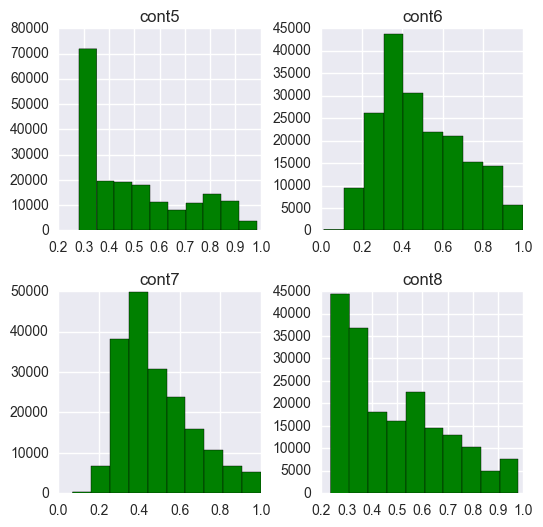

In [84]:
pylab.rcParams['figure.figsize'] = (6, 6)
DATA.loc[:,"cont5":"cont8"].hist(color='green')
DATA.loc[:,"cont5":"cont8"].describe()

,cont9,cont10,cont11,cont12
count,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.485506,0.498066,0.493511,0.493150
std,0.181660,0.185877,0.209737,0.209427
min,0.000080,0.000000,0.035321,0.036232
25%,0.358970,0.364580,0.310961,0.311661
50%,0.441450,0.461190,0.457203,0.462286
75%,0.566820,0.614590,0.678924,0.675759
max,0.995400,0.994980,0.998742,0.998484


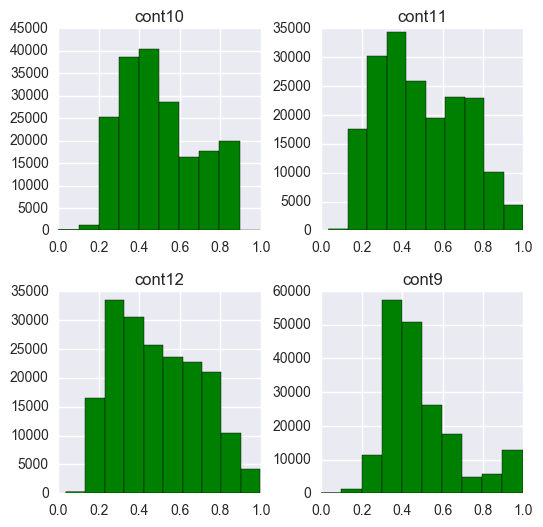

In [83]:
pylab.rcParams['figure.figsize'] = (6, 6)
DATA.loc[:,"cont9":"cont12"].hist(color='green')
DATA.loc[:,"cont9":"cont12"].describe()

,cont13,cont14
count,188318.000000,188318.000000
mean,0.493138,0.495717
std,0.212777,0.222488
min,0.000228,0.179722
25%,0.315758,0.294610
50%,0.363547,0.407403
75%,0.689974,0.724623
max,0.988494,0.844848


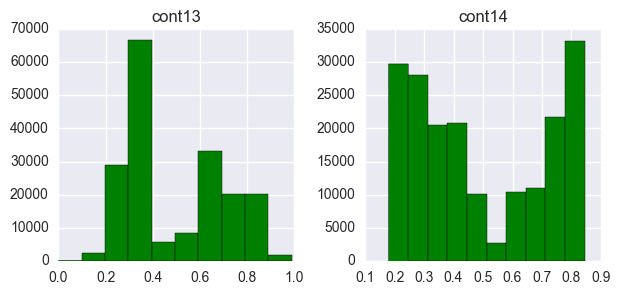

In [86]:
pylab.rcParams['figure.figsize'] = (7, 3)
DATA.loc[:,"cont13":"cont14"].hist(color='green')
DATA.loc[:,"cont13":"cont14"].describe()

In [62]:
skewed = DATA.loc[:,"cont1":"loss"].apply(lambda x: skew(x))
skewed

cont1     0.516420
cont2    -0.310939
cont3    -0.010002
cont4     0.416093
cont5     0.681617
cont6     0.461211
cont7     0.826046
cont8     0.676629
cont9     1.072420
cont10    0.354998
cont11    0.280819
cont12    0.291990
cont13    0.380739
cont14    0.248672
loss      3.794928
dtype: float64

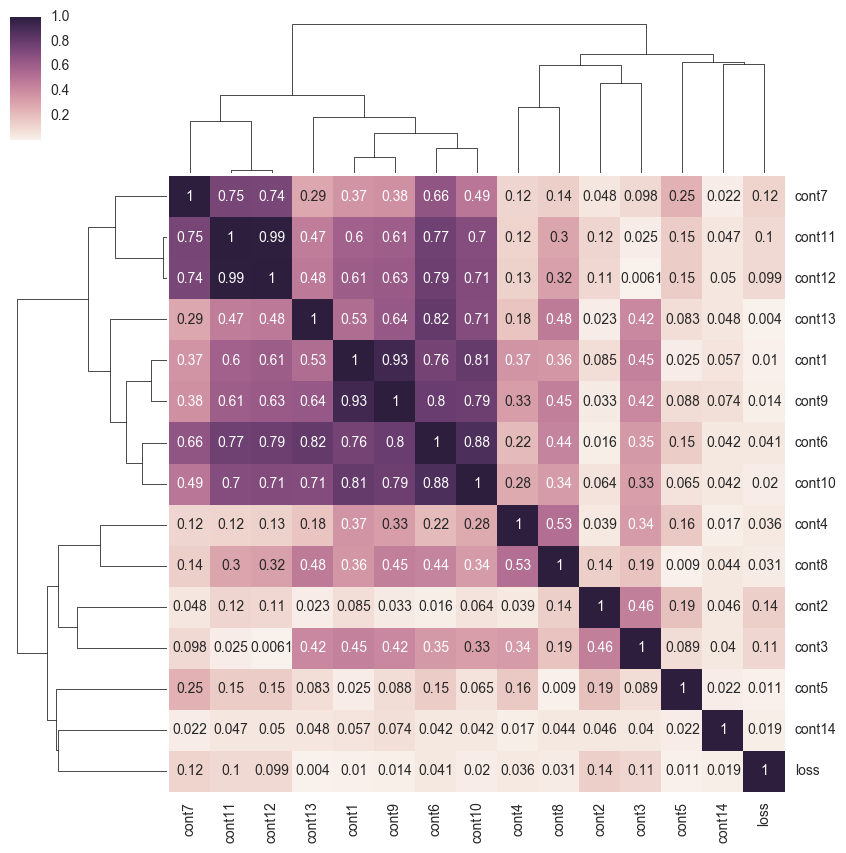

In [40]:
DATA_CONTINUOUS = DATA.iloc[:,117:132]
DATA_CONTINUOUS = DATA_CONTINUOUS.corr().abs()
map = sns.clustermap(DATA_CONTINUOUS, annot = True, annot_kws = {'size': 10})
sns.plt.setp(map.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0)
sns.plt.show()

# Preprocessing

In [63]:
categorical_covariates = []
numerical_covariates = []

for col,x in DATA.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        numerical_covariates.append(col)
    else:
        categorical_covariates.append(col)

numerical_covariates.remove("id")

print("\n")
print(categorical_covariates)
print("\n")
print(numerical_covariates)



['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', 'cat1

In [64]:
DATACAT = DATA[categorical_covariates]
DATANUM = DATA[numerical_covariates]

In [65]:
DATACAT.head(1)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
0,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB


In [66]:
DATANUM.head(1)

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,0.7263,0.245921,0.187583,0.789639,0.310061,0.718367,0.33506,0.3026,0.67135,0.8351,0.569745,0.594646,0.822493,0.714843,2213.18


In [67]:
for x in categorical_covariates:
    lb = LabelEncoder()
    lb.fit(DATA[x].unique())
    DATA[x] = lb.transform(DATA[x])

In [68]:
DATA.head(5)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,1,1,3,3,1,3,2,1,3,1,0,0,0,0,0,3,1,2,4,0,2,15,1,6,0,0,8,4,6,9,6,45,28,2,19,55,0,14,269,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,3,3,0,1,2,1,3,1,0,0,0,0,0,3,3,2,4,4,3,15,11,5,0,0,4,4,8,10,10,33,65,0,22,38,0,14,85,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,3,1,3,2,1,1,1,0,0,0,0,0,3,3,2,4,4,0,1,11,14,0,1,4,5,7,5,0,2,85,0,28,5,0,8,153,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,1,1,3,3,3,1,2,1,3,1,0,0,0,0,0,3,3,2,4,4,3,15,8,3,0,0,4,4,8,10,10,33,67,2,39,4,0,14,79,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1,3,1,3,1,1,2,1,1,2,0,0,0,1,5,3,1,3,4,4,0,12,5,9,0,0,3,4,10,6,1,66,50,2,50,38,0,10,55,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


# Modelling

In [6]:
seed = 1

trainx = DATA.columns[1:-1]
trainy = DATA.columns[-1]

X = DATA[trainx]
Y = DATA[trainy]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [7]:
start_time = time.clock()

print("")
print("")
print("") 
print("List of Average ROC AUC According to the Algorithm (Training Dataset with K-Fold Cross-validation)")
print("") 

N_ES = 10
K = 10

start_time = time.clock()

model1 = LinearRegression(n_jobs=-1)
results1 = cross_val_score(model1, X_train, y_train, cv=K, scoring='mean_squared_error', n_jobs=1)
print("Linear Regression (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results1.mean(), results1.std()))

model2 = Ridge(alpha=1,random_state=seed)
results2 = cross_val_score(model2, X_train, y_train, cv=K, scoring='mean_squared_error', n_jobs=1)
print("Linear Regression Ridge (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results2.mean(), results2.std()))

model3 = Lasso(alpha=1,random_state=seed)
results3 = cross_val_score(model3, X_train, y_train, cv=K, scoring='mean_squared_error', n_jobs=1)
print("Linear Regression Lasso (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results3.mean(), results3.std()))

#model4 = ElasticNet(alpha=1,random_state=seed)
#results4 = cross_val_score(model4, X_train, y_train, cv=K, scoring='roc_auc', n_jobs=1)
#print("Linear Regression Elastic Net (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results4.mean(), results4.std()))

#model5 = RandomForestRegressor(n_jobs=-1,n_estimators=N_ES, max_features=5, random_state=seed)
#results5 = cross_val_score(model5, X_train, y_train, cv=K, scoring='mean_squared_error', n_jobs=1)
#print("Random Forest (Manual Tuning): ({0:.3f}) +/- ({1:.3f})".format(results5.mean(), results5.std()))





List of Average ROC AUC According to the Algorithm (Training Dataset with K-Fold Cross-validation)



ValueError: could not convert string to float: 'DJ'

Work in Progress...
Work in Progress...
Work in Progress...